In [ ]:
# Description: Use the Relative Strength Index (RSI) and Python to determine if a stock is being over bought or sold

In [ ]:
# An RSI determines when to buy or sell, over sold = good time to buy, over bought = good time sell. 
# Common time period for RSI is 14 days. The RSI returns values from 0-100. 
# High/low values are: 100 90 80 70 30 20 10  
# The higher the high level and lower the low value indicates a stronger price momentum shift. 
# Ex: a stock is considered over bought when above 70 and over sold when below 30

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
import pandas_datareader.data as web
import datetime as dt

# Date format: YYYY, M, D
start = dt.datetime(2019,9,2)
end = dt.datetime(2020,9,20)
CL = web.DataReader('CL=F','yahoo',start,end).reset_index()
HO = web.DataReader('HO=F','yahoo',start,end).reset_index()
TSLA = web.DataReader('TSLA','yahoo',start,end).reset_index()

In [16]:
# Show the data
TSLA

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-03,45.790001,44.632000,44.816002,45.001999,26770500.0,45.001999
1,2019-09-04,45.692001,43.841999,45.377998,44.136002,28805000.0,44.136002
2,2019-09-05,45.959999,44.169998,44.500000,45.916000,36976500.0,45.916000
3,2019-09-06,45.928001,45.034000,45.439999,45.490002,20947000.0,45.490002
4,2019-09-09,46.751999,45.846001,46.000000,46.358002,24013500.0,46.358002
...,...,...,...,...,...,...,...
260,2020-09-14,420.000000,373.299988,380.950012,419.619995,83020600.0,419.619995
261,2020-09-15,461.940002,430.700012,436.559998,449.760010,97298200.0,449.760010
262,2020-09-16,457.790009,435.309998,439.869995,441.760010,72279300.0,441.760010
263,2020-09-17,437.790009,408.000000,415.600006,423.429993,76779200.0,423.429993


In [17]:
CL

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-03,55.240002,52.840000,55.000000,53.939999,970804.0,53.939999
1,2019-09-04,56.580002,53.840000,53.919998,56.259998,682298.0,56.259998
2,2019-09-05,57.759998,55.750000,55.950001,56.299999,712466.0,56.299999
3,2019-09-06,56.950001,54.830002,56.189999,56.520000,714294.0,56.520000
4,2019-09-09,58.160000,56.580002,56.799999,57.849998,646993.0,57.849998
...,...,...,...,...,...,...,...
289,2020-09-14,37.680000,36.820000,37.320000,37.259998,347563.0,37.259998
290,2020-09-15,38.570000,37.060001,37.279999,38.279999,348861.0,38.279999
291,2020-09-16,40.340000,38.349998,38.349998,40.160000,367612.0,40.160000
292,2020-09-17,41.220001,39.419998,40.189999,40.970001,280669.0,40.970001


In [12]:
HO

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-03,1.8402,1.7770,1.8302,1.8033,81417.0,1.8033
1,2019-09-04,1.8850,1.8006,1.8026,1.8802,73326.0,1.8802
2,2019-09-05,1.9206,1.8754,1.8798,1.8885,63706.0,1.8885
3,2019-09-06,1.9099,1.8444,1.8868,1.9003,50028.0,1.9003
4,2019-09-09,1.9369,1.8981,1.8992,1.9277,51757.0,1.9277
...,...,...,...,...,...,...,...
289,2020-09-10,1.1083,1.0734,1.1010,1.0824,57079.0,1.0824
290,2020-09-11,1.1037,1.0717,1.0771,1.0896,52996.0,1.0896
291,2020-09-14,1.0993,1.0759,1.0937,1.0934,59568.0,1.0934
292,2020-09-15,1.1063,1.0809,1.0924,1.0993,53234.0,1.0993


In [18]:
# Set the date as the index for the data
TSLA = TSLA.set_index(pd.DatetimeIndex(TSLA['Date'].values))
CL = CL.set_index(pd.DatetimeIndex(CL['Date'].values))
HO = HO.set_index(pd.DatetimeIndex(HO['Date'].values))

TSLA

,Date,High,Low,Open,Close,Volume,Adj Close
2019-09-03,2019-09-03,45.790001,44.632000,44.816002,45.001999,26770500.0,45.001999
2019-09-04,2019-09-04,45.692001,43.841999,45.377998,44.136002,28805000.0,44.136002
2019-09-05,2019-09-05,45.959999,44.169998,44.500000,45.916000,36976500.0,45.916000
2019-09-06,2019-09-06,45.928001,45.034000,45.439999,45.490002,20947000.0,45.490002
2019-09-09,2019-09-09,46.751999,45.846001,46.000000,46.358002,24013500.0,46.358002
...,...,...,...,...,...,...,...
2020-09-14,2020-09-14,420.000000,373.299988,380.950012,419.619995,83020600.0,419.619995
2020-09-15,2020-09-15,461.940002,430.700012,436.559998,449.760010,97298200.0,449.760010
2020-09-16,2020-09-16,457.790009,435.309998,439.869995,441.760010,72279300.0,441.760010
2020-09-17,2020-09-17,437.790009,408.000000,415.600006,423.429993,76779200.0,423.429993


In [19]:
CL

,Date,High,Low,Open,Close,Volume,Adj Close
2019-09-03,2019-09-03,55.240002,52.840000,55.000000,53.939999,970804.0,53.939999
2019-09-04,2019-09-04,56.580002,53.840000,53.919998,56.259998,682298.0,56.259998
2019-09-05,2019-09-05,57.759998,55.750000,55.950001,56.299999,712466.0,56.299999
2019-09-06,2019-09-06,56.950001,54.830002,56.189999,56.520000,714294.0,56.520000
2019-09-09,2019-09-09,58.160000,56.580002,56.799999,57.849998,646993.0,57.849998
...,...,...,...,...,...,...,...
2020-09-14,2020-09-14,37.680000,36.820000,37.320000,37.259998,347563.0,37.259998
2020-09-15,2020-09-15,38.570000,37.060001,37.279999,38.279999,348861.0,38.279999
2020-09-16,2020-09-16,40.340000,38.349998,38.349998,40.160000,367612.0,40.160000
2020-09-17,2020-09-17,41.220001,39.419998,40.189999,40.970001,280669.0,40.970001


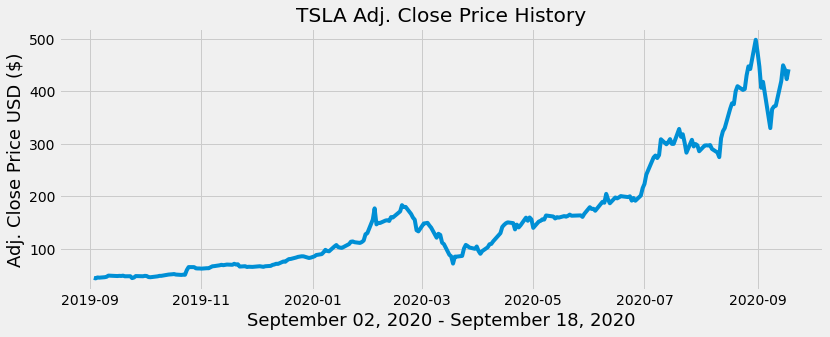

In [27]:
# Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(TSLA.index, TSLA['Adj Close'], label = 'Adj Close Price')
plt.title('TSLA Adj. Close Price History')
plt.xlabel('September 02, 2020 - September 18, 2020', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

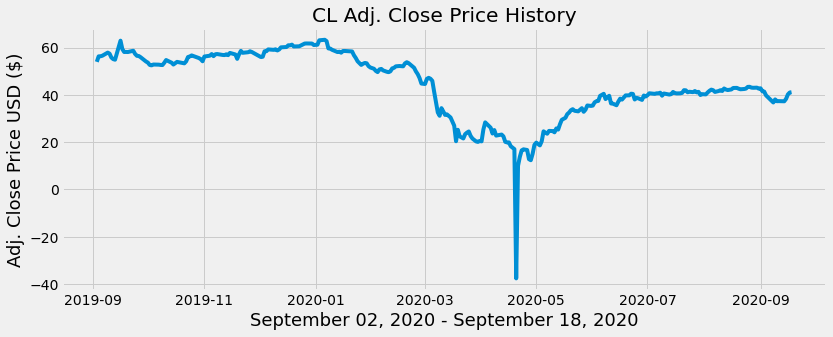

In [28]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(CL.index, CL['Adj Close'], label = 'Adj Close Price')
plt.title('CL Adj. Close Price History')
plt.xlabel('September 02, 2020 - September 18, 2020', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

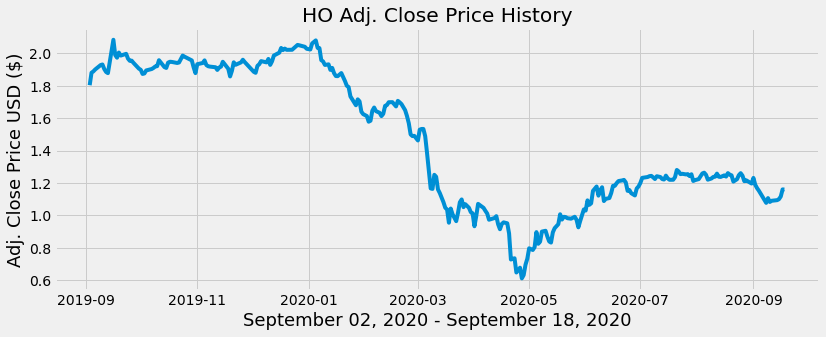

In [29]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(HO.index, HO['Adj Close'], label = 'Adj Close Price')
plt.title('HO Adj. Close Price History')
plt.xlabel('September 02, 2020 - September 18, 2020', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

In [30]:
# Prepare the data to calculate the RSI

# Get the difference in price from the previous day
delta = TSLA['Adj Close'].diff(1)
delta

2019-09-03          NaN
2019-09-04    -0.865997
2019-09-05     1.779999
2019-09-06    -0.425999
2019-09-09     0.868000
                ...    
2020-09-14    46.899994
2020-09-15    30.140015
2020-09-16    -8.000000
2020-09-17   -18.330017
2020-09-18    18.720001
Name: Adj Close, Length: 265, dtype: float64

In [31]:
delta1 = CL['Adj Close'].diff(1)
delta1

2019-09-03         NaN
2019-09-04    2.320000
2019-09-05    0.040001
2019-09-06    0.220001
2019-09-09    1.329998
                ...   
2020-09-14   -0.070004
2020-09-15    1.020000
2020-09-16    1.880001
2020-09-17    0.810001
2020-09-18    0.139999
Name: Adj Close, Length: 294, dtype: float64

In [32]:
delta2 = HO['Adj Close'].diff(1)
delta2

2019-09-03       NaN
2019-09-04    0.0769
2019-09-05    0.0083
2019-09-06    0.0118
2019-09-09    0.0274
               ...  
2020-09-14    0.0038
2020-09-15    0.0059
2020-09-16    0.0170
2020-09-17    0.0435
2020-09-18   -0.0008
Name: Adj Close, Length: 296, dtype: float64

In [47]:
# Drop the NaN value (seeing the first date didn't have a difference)
delta = delta.dropna()
delta

2019-09-04    -0.865997
2019-09-05     1.779999
2019-09-06    -0.425999
2019-09-09     0.868000
2019-09-10     0.750000
                ...    
2020-09-10     5.059998
2020-09-11     1.380005
2020-09-14    46.899994
2020-09-15    30.140015
2020-09-16    -8.000000
Name: Adj Close, Length: 262, dtype: float64

In [19]:
delta1 = delta1.dropna()
delta1

2019-09-04    2.320000
2019-09-05    0.040001
2019-09-06    0.220001
2019-09-09    1.329998
2019-09-10   -0.449997
                ...   
2020-09-10   -0.750000
2020-09-11    0.030003
2020-09-14   -0.070004
2020-09-15    1.020000
2020-09-16    1.880001
Name: Adj Close, Length: 285, dtype: float64

In [33]:
delta2 = delta2.dropna()
delta2

2019-09-04    0.0769
2019-09-05    0.0083
2019-09-06    0.0118
2019-09-09    0.0274
2019-09-10    0.0035
               ...  
2020-09-14    0.0038
2020-09-15    0.0059
2020-09-16    0.0170
2020-09-17    0.0435
2020-09-18   -0.0008
Name: Adj Close, Length: 295, dtype: float64

In [35]:
# Get the positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down > 0 ] = 0 

In [36]:
up1 = delta1.copy()
down1 = delta1.copy()

up1[up1<0] = 0
down1[down1 > 0 ] = 0 

In [37]:
up2 = delta2.copy()
down2 = delta2.copy()

up2[up2<0] = 0
down2[down2 > 0 ] = 0 

In [38]:
# Get the time period
period = 14
# Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [39]:
AVG_Gain1 = up1.rolling(window=period).mean()
AVG_Loss1 = abs(down1.rolling(window=period).mean())

In [40]:
AVG_Gain2 = up2.rolling(window=period).mean()
AVG_Loss2 = abs(down2.rolling(window=period).mean())

In [41]:
# Calculate the RSI

# Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

In [42]:
RS1 = AVG_Gain1 / AVG_Loss1
RSI1 = 100.0 - (100.0 / (1.0 +RS1))

In [55]:
RS2 = AVG_Gain2 / AVG_Loss2
RSI2 = 100.0 - (100.0 / (1.0 +RS2))

<function matplotlib.pyplot.show>

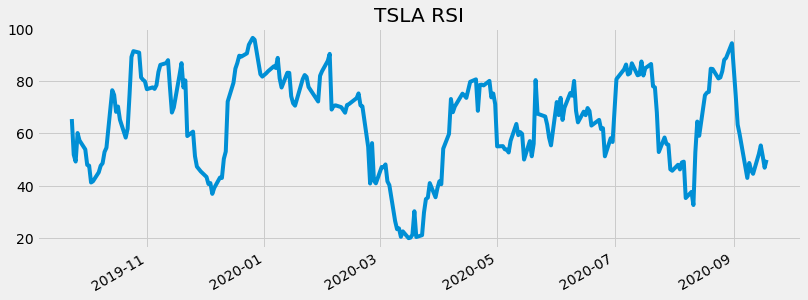

In [56]:
# Show the RSI Visually
plt.figure(figsize = (12.2, 4.5))
plt.title('TSLA RSI')
RSI.plot()
plt.show

<function matplotlib.pyplot.show>

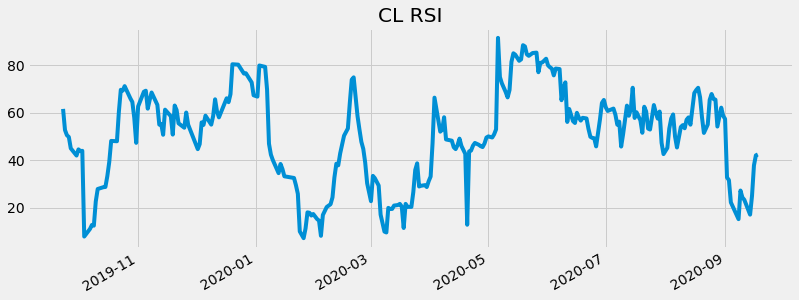

In [57]:
plt.figure(figsize = (12.2, 4.5))
plt.title('CL RSI')
RSI1.plot()
plt.show

<function matplotlib.pyplot.show>

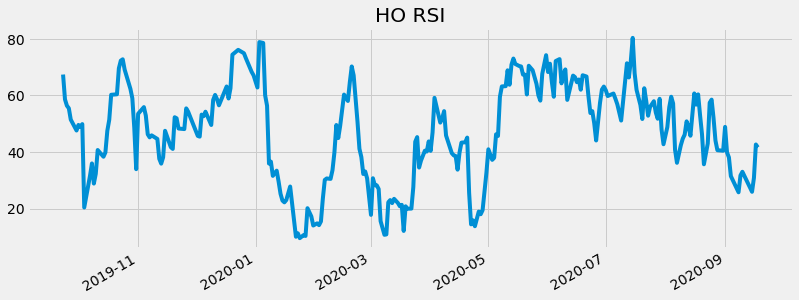

In [58]:
plt.figure(figsize = (12.2, 4.5))
plt.title('HO RSI')
RSI2.plot()
plt.show

In [59]:
# Put it all together

# Create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close Price'] = TSLA['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close Price,RSI
2019-09-03,45.001999,NaN
2019-09-04,44.136002,NaN
2019-09-05,45.916000,NaN
2019-09-06,45.490002,NaN
2019-09-09,46.358002,NaN
...,...,...
2020-09-14,419.619995,52.174814
2020-09-15,449.760010,55.444684
2020-09-16,441.760010,51.404352
2020-09-17,423.429993,46.939648


In [60]:
new_df1 = pd.DataFrame()
new_df1['Adj Close Price'] = CL['Adj Close']
new_df1['RSI'] = RSI1
new_df1

,Adj Close Price,RSI
2019-09-03,53.939999,NaN
2019-09-04,56.259998,NaN
2019-09-05,56.299999,NaN
2019-09-06,56.520000,NaN
2019-09-09,57.849998,NaN
...,...,...
2020-09-14,37.259998,17.009748
2020-09-15,38.279999,24.975509
2020-09-16,40.160000,37.734239
2020-09-17,40.970001,41.987182


In [61]:
new_df2 = pd.DataFrame()
new_df2['Adj Close Price'] = HO['Adj Close']
new_df2['RSI'] = RSI2
new_df2

,Adj Close Price,RSI
2019-09-03,1.8033,NaN
2019-09-04,1.8802,NaN
2019-09-05,1.8885,NaN
2019-09-06,1.9003,NaN
2019-09-09,1.9277,NaN
...,...,...
2020-09-14,1.0934,27.336871
2020-09-15,1.0993,25.899287
2020-09-16,1.1163,30.847257
2020-09-17,1.1598,42.616773


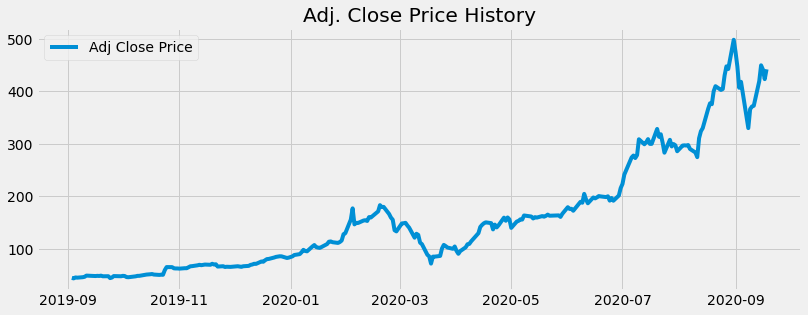

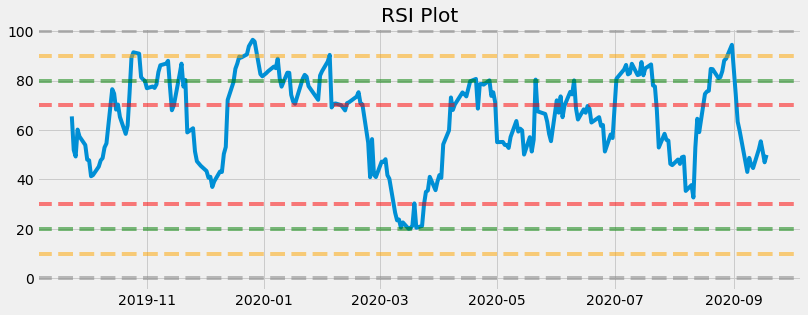

In [62]:
# Visually show the adjusted close price and RSI

# Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()
# Plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0,linestyle='--', alpha = 0.5, color = 'gray')
plt.axhline(10,linestyle='--', alpha = 0.5, color = 'orange')
plt.axhline(20,linestyle='--', alpha = 0.5, color = 'green')
plt.axhline(30,linestyle='--', alpha = 0.5, color = 'red')
plt.axhline(70,linestyle='--', alpha = 0.5, color = 'red')
plt.axhline(80,linestyle='--', alpha = 0.5, color = 'green')
plt.axhline(90,linestyle='--', alpha = 0.5, color = 'orange')
plt.axhline(100,linestyle='--', alpha = 0.5, color = 'gray')

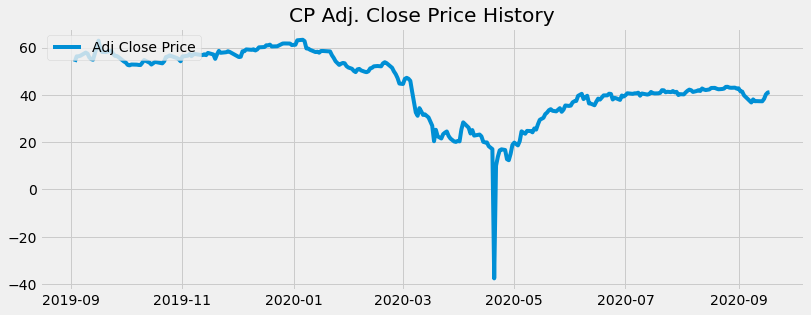

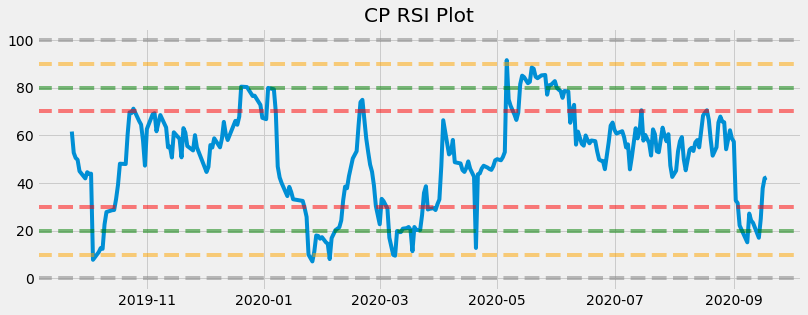

In [63]:
# Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df1.index, new_df1['Adj Close Price'])
plt.title('CP Adj. Close Price History')
plt.legend(new_df1.columns.values, loc = 'upper left')
plt.show()
# Plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.title('CP RSI Plot')
plt.plot(new_df1.index, new_df1['RSI'])
plt.axhline(0,linestyle='--', alpha = 0.5, color = 'gray')
plt.axhline(10,linestyle='--', alpha = 0.5, color = 'orange')
plt.axhline(20,linestyle='--', alpha = 0.5, color = 'green')
plt.axhline(30,linestyle='--', alpha = 0.5, color = 'red')
plt.axhline(70,linestyle='--', alpha = 0.5, color = 'red')
plt.axhline(80,linestyle='--', alpha = 0.5, color = 'green')
plt.axhline(90,linestyle='--', alpha = 0.5, color = 'orange')
plt.axhline(100,linestyle='--', alpha = 0.5, color = 'gray')

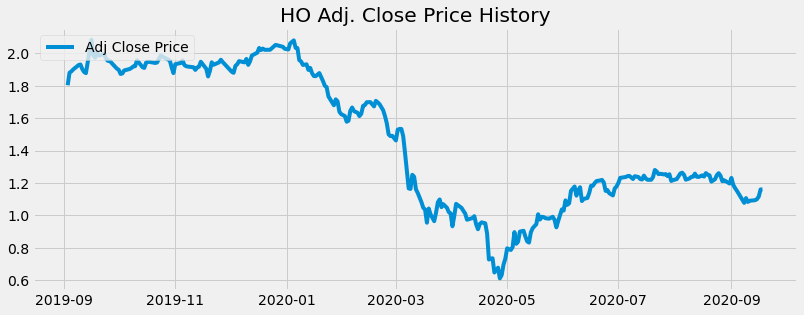

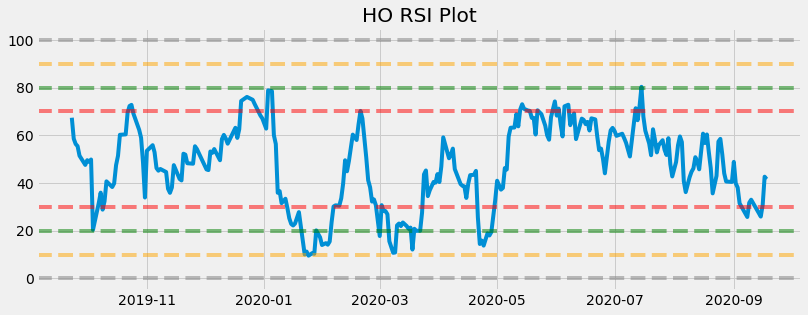

In [64]:
# Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df2.index, new_df2['Adj Close Price'])
plt.title('HO Adj. Close Price History')
plt.legend(new_df2.columns.values, loc = 'upper left')
plt.show()
# Plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.title('HO RSI Plot')
plt.plot(new_df2.index, new_df2['RSI'])
plt.axhline(0,linestyle='--', alpha = 0.5, color = 'gray')
plt.axhline(10,linestyle='--', alpha = 0.5, color = 'orange')
plt.axhline(20,linestyle='--', alpha = 0.5, color = 'green')
plt.axhline(30,linestyle='--', alpha = 0.5, color = 'red')
plt.axhline(70,linestyle='--', alpha = 0.5, color = 'red')
plt.axhline(80,linestyle='--', alpha = 0.5, color = 'green')
plt.axhline(90,linestyle='--', alpha = 0.5, color = 'orange')
plt.axhline(100,linestyle='--', alpha = 0.5, color = 'gray')